In [1]:
# https://www.youtube.com/watch?v=_BHvE_pwF6E
import math
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style

style.use("ggplot")
%matplotlib inline

qasm_sim = q.Aer.get_backend("qasm_simulator")
statevec_sim = q.Aer.get_backend("statevector_simulator")

# Uncertain Qubits

In [2]:
c = q.QuantumCircuit(2,2)
c.ry(math.pi/4, 0) # rotate y. Rotate along y axis by radians
c.ry(math.pi/4, 1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

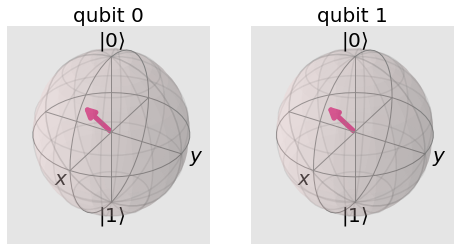

In [3]:
plot_bloch_multivector(orig_statevec)

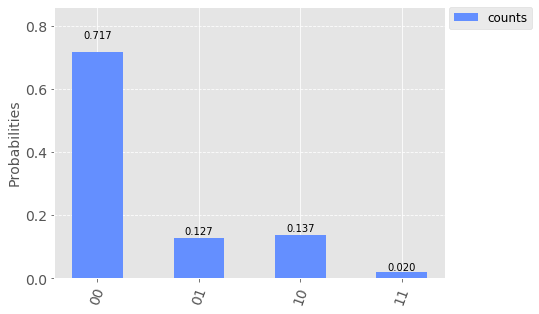

In [4]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])

# Hadamards before Uncertain Qubits

In [5]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
statevec2 = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

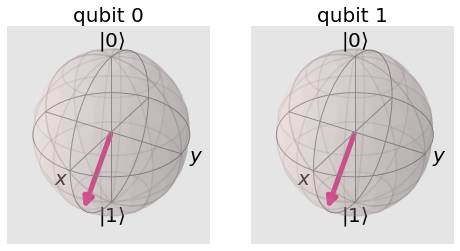

In [6]:
plot_bloch_multivector(statevec2)

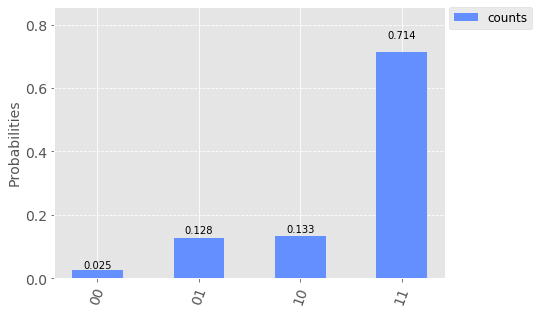

In [7]:
counts2 = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts2], legend=["counts"])

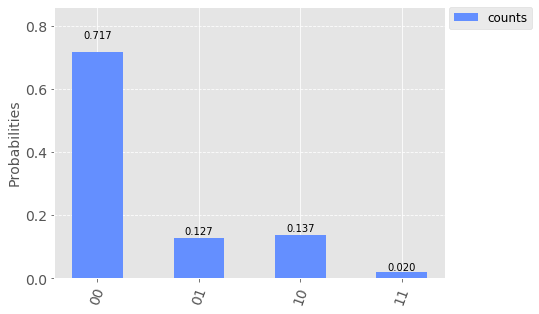

In [8]:
plot_histogram([orig_counts], legend=["counts"])

# Hadamard before and after Uncertain Qubits

In [9]:
c = q.QuantumCircuit(2,2)
c.h(0) # hadamard gate. Rotate along the axis of x+z by pi radians (180 degrees)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
c.h(0)
c.h(1)
statevec3 = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

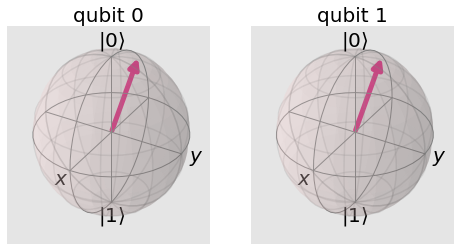

In [10]:
plot_bloch_multivector(statevec3)

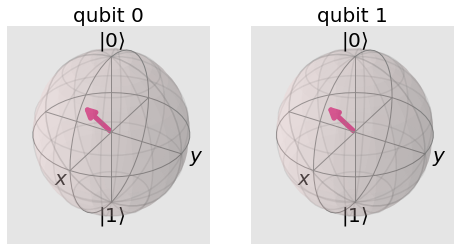

In [11]:
plot_bloch_multivector(orig_statevec)

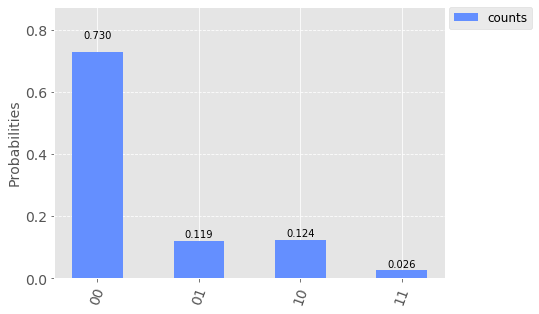

In [12]:
counts3 = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts3], legend=["counts"])

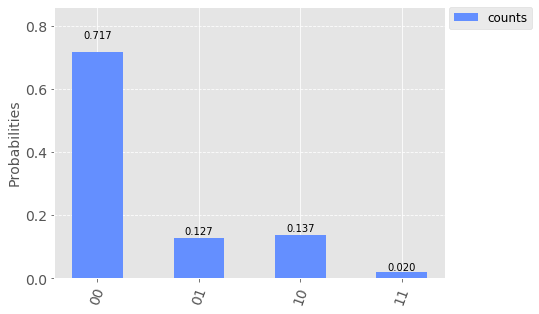

In [13]:
plot_histogram([orig_counts], legend=["counts"])

# Certain Qubits

In [14]:
c = q.QuantumCircuit(2,2)
c.x(0) # not gate. Rotate along the x axis by 180 degrees, or pi radians
c.x(1)
statevec4 = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

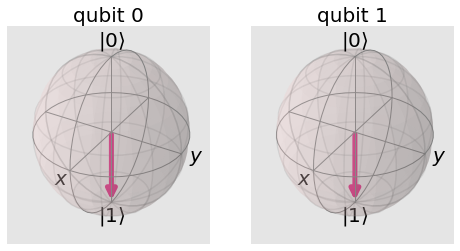

In [15]:
plot_bloch_multivector(statevec4)

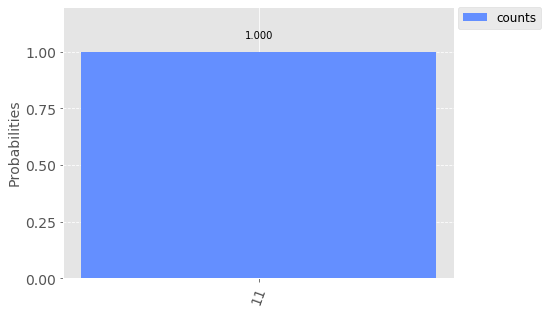

In [16]:
counts4 = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts4], legend=["counts"])

# Hadamard before Certain Qubits

In [17]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
statevec5 = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

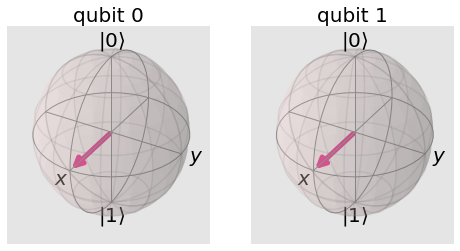

In [18]:
plot_bloch_multivector(statevec5)

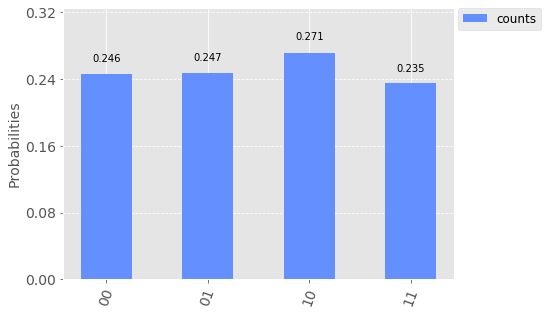

In [19]:
counts5 = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts5], legend=["counts"])

# Hadamard before and after Certain Qubits

In [20]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
statevec6 = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

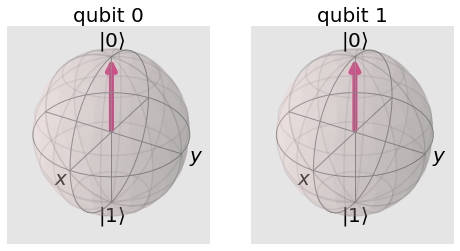

In [21]:
plot_bloch_multivector(statevec6)

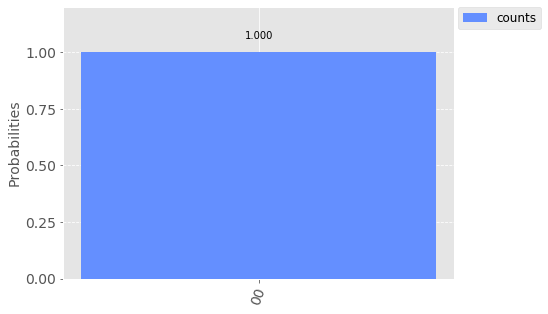

In [22]:
counts6 = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts6], legend=["counts"])

In [23]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
    
def constant_black_box(c):
    return c

In [24]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw()

In [25]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()

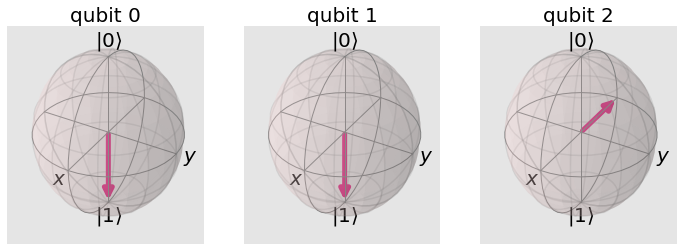

In [26]:
statevec7 = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec7)

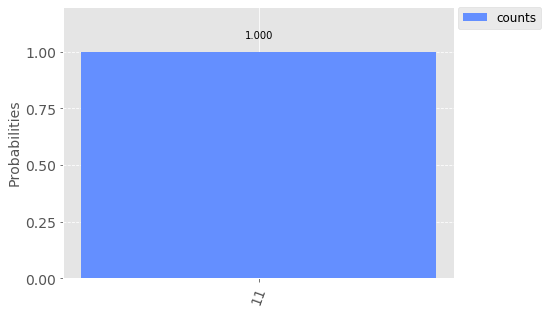

In [27]:
counts7 = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts7], legend=["counts"])

In [28]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()

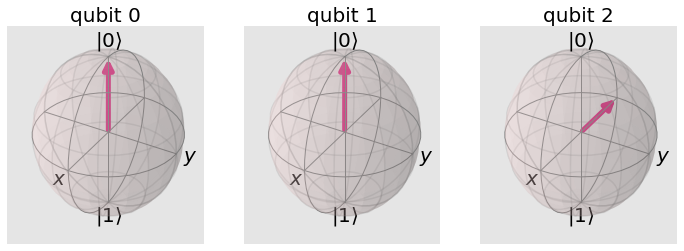

In [29]:
statevec8 = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec8)

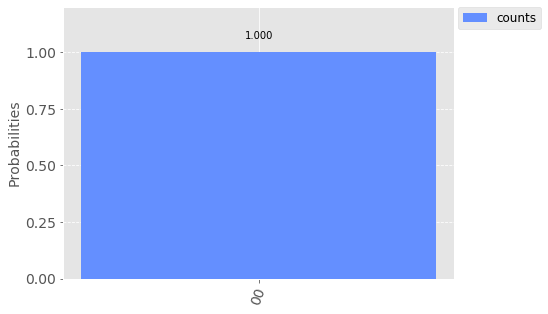

In [30]:
counts8 = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts8], legend=["counts"])

# Some other tests

In [31]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
c.draw()

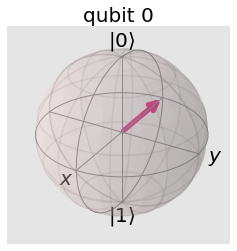

In [32]:
statevec9 = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec9)

In [33]:
c = q.QuantumCircuit(1,1)
c.h(0)
c.x(0)
c.draw()

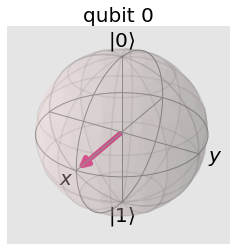

In [34]:
statevec10 = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec10)

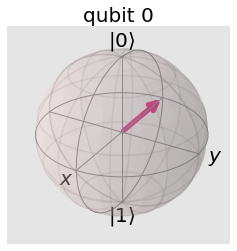

In [35]:
c = q.QuantumCircuit(1,1)
c.ry(math.pi,0)
c.h(0)
statevec10 = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec10)

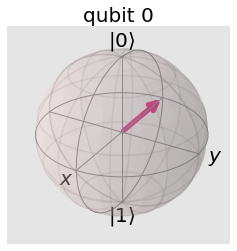

In [36]:
c = q.QuantumCircuit(1,1)
c.h(0)
c.ry(math.pi,0)
statevec10 = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec10)

In [47]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c.x(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()

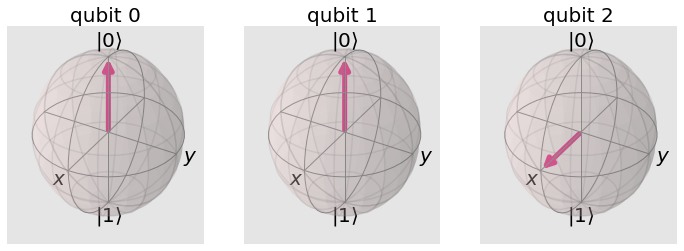

In [48]:
statevec11 = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec11)

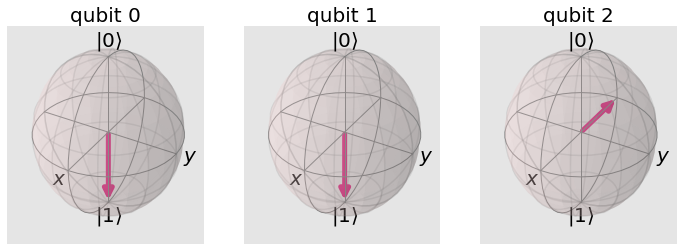

In [49]:
plot_bloch_multivector(statevec7)

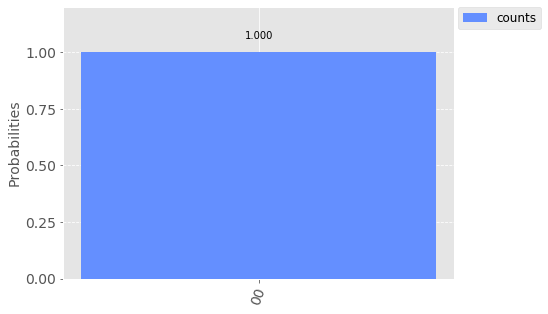

In [46]:
counts11 = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts11], legend=["counts"])

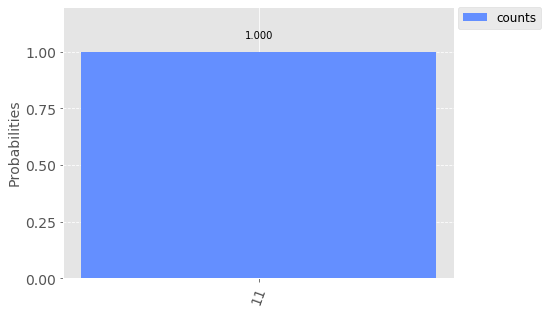

In [50]:
plot_histogram([counts7], legend=["counts"])

In [51]:
c = q.QuantumCircuit(3,2)
c.ry(math.pi, 2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()

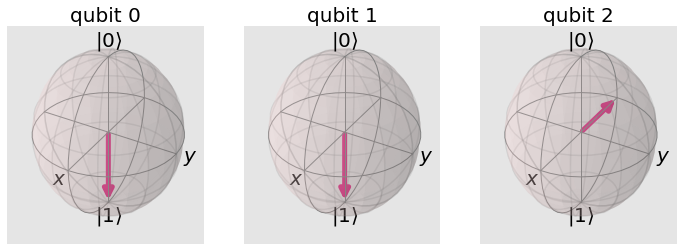

In [52]:
statevec12 = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec12)

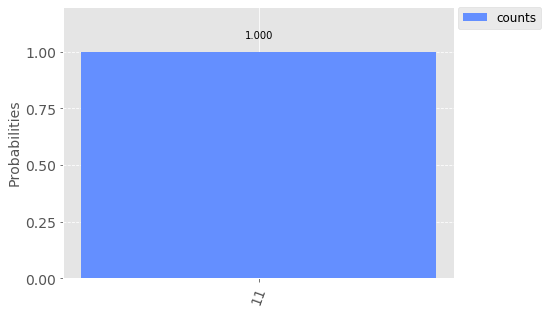

In [53]:
counts12 = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts12], legend=["counts"])

In [56]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c.ry(math.pi, 2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()

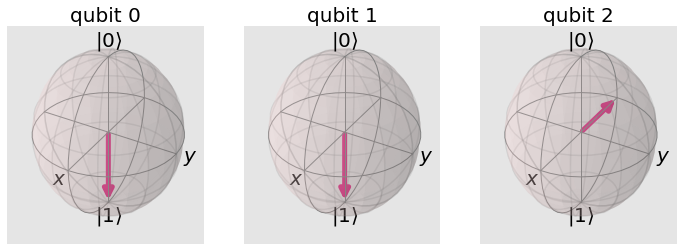

In [57]:
statevec13 = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec13)

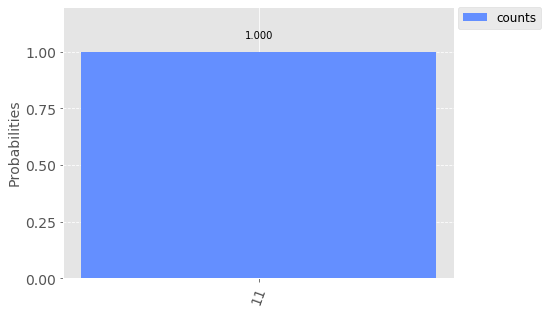

In [55]:
counts13 = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts13], legend=["counts"])